<a href="https://colab.research.google.com/github/LSDtopotools/lsdtt_notebooks/blob/master/lsdtopotools/basic_examples/Getting_elevations_from_sample_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting elevations and slopes from points

Last updated by Simon M Mudd 11/04/2024

**WARNING THIS IS INCOMPLETE**

In this notebook we will use an example where you have collected some channel characteristics in the field and we want to know the drainage area of the points. This will include the simplest possible example where all we have is the location of the points.

## Stuff we need to do if you are in colab (not required in the lsdtopotools pytools container)

**If you are in the `docker_lsdtt_pytools` docker container, you do not need to do any of this.
The following is for executing this code in the google colab environment only.**

If you are in the docker container you can skip to the **Download some data** section.

First we install `lsdtopotools`. The first line downloads the package and the second installs it. The `/dev/null` stuff is just to stop the notebook printing a bunch of text to screen.  

In [1]:
!wget https://pkgs.geos.ed.ac.uk/geos-jammy/pool/world/l/lsdtopotools2/lsdtopotools2_0.9-1geos~22.04.1_amd64.deb  &> /dev/null
!apt install ./lsdtopotools2_0.9-1geos~22.04.1_amd64.deb  &> /dev/null

The next line tests to see if it worked. If you get some output asking for a parameter file then `lsdtopotools` is installed. This notebook was tested on version 0.9.

In [2]:
!lsdtt-basic-metrics -v

|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| http://doi.org/10.5281/zenodo.4577879               ||
|| If you use the roughness routine please cite:       ||
|| https://www.doi.org/10.5194/esurf-3-483-2015        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.io/LSDTT_documentation/ ||
|| This is LSDTopoTools2 version                       ||
|| 0.9
|| If the version number has a d at the end it is a    ||
||  development version.                               ||
|| You have called an LSDTopoTools program.            ||
|| Prepare to explore topographic data!                ||
|| You can find some examples of usage here:           ||
|| http

Now we install `lsdviztools`:

In [3]:
!pip install lsdviztools  &> /dev/null

## First get data

Before we do anything, we need to import a few packages:

In [4]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw

Now we need to get some data to download. We are going to download data using the opentopography scraper that is included with `lsdviztools`.

**You will need to get an opentopography.org account and copy in your API key.**

The API key can be placed in a text file called "my_OT_api_key.txt"

You can sign up to an opentopography.org account here: https://portal.opentopography.org/myopentopo

Before I actually do anything I am going to set up some filenames:

In [5]:
Dataset_prefix = "RioAguas"
source_name = "COP30"

r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
w_prefix = Dataset_prefix+"_"+source_name +"_UTM"

DataDirectory = "./"
Base_file = r_prefix

Now lets grab the data. If you want to do this yourself for a new area just choose your own lower lect and upper right coordinates of your site.

**IMPORTANT: in a later stage you will extract a basin, and it is essential you capture the entire basin. If part of the basin is cut off from the edge of the DEM the extraction will not work!**

In [6]:
# YOU NEED TO PUT YOUR API KEY IN A FILE
your_OT_api_key_file = "my_OT_api_key.txt"

with open(your_OT_api_key_file, 'r') as file:
    print("I am reading you OT API key from the file "+your_OT_api_key_file)
    api_key = file.read().rstrip()
    print("Your api key starts with: "+api_key[0:4])

SB_DEM = bmt.ot_scraper(source = source_name,
                        lower_left_coordinates = [36.851228654362174, -2.6381856533639376],
                        upper_right_coordinates = [37.23786389643628, -2.1355154090152344],
                        prefix = Dataset_prefix,
                        api_key_file = your_OT_api_key_file)
SB_DEM.print_parameters()
SB_DEM.download_pythonic()
DataDirectory = "./"
Fname = Dataset_prefix+"_"+source_name+".tif"
gio.convert4lsdtt(DataDirectory,Fname)

I am reading you OT API key from the file my_OT_api_key.txt
Your api key starts with: 9515
I am taking your coordinates from the lower left list
I am taking your coordinates from the upper right list
I am reading you OT API key from the file my_OT_api_key.txt
The source is: COP30
The west longitude is: -2.6381856533639376
The east longitude is: -2.1355154090152344
The south latitude is: 37.23786389643628
The north latitude is: 36.851228654362174
The path is: ./
The prefix is: RioAguas
The resolution is: 30
I am going to download a file from opentopography (I've removed the API key):
https://portal.opentopography.org/API/globaldem?demtype=COP30&south=36.851228654362174&north=37.23786389643628&west=-2.6381856533639376&east=-2.1355154090152344&outputFormat=GTiff
This might take a little while, depending on the size of the file. 
The filename will be:
./RioAguas_COP30.tif
The path and file without path are:
./  RioAguas_COP30.tif
Finished downloading
The projections is:
GEOGCS["WGS 84",DAT

'RioAguas_COP30_UTM.bil'

Now lets see what files we have:

In [8]:
!ls *.bil *tif

RioAguas_COP30.tif  RioAguas_COP30_UTM.bil  RioAguas_COP30_UTM.tif


## Now import some points

## Look at the hillshade

Right, lets see what this place looks like:

In [11]:
lsdtt_parameters = {"write_hillshade" : "true"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling', 'lsdtt-valley-metrics']
Testing has been done against lsdtopotools v0.7
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: RioAguas_COP30_UTM
The write prefix is: RioAguas_COP30_UTM
The parameter dictionary is:
{'write_hillshade': 'true'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


Your colourbar will be located: right
xsize: 1500 and y size: 1440
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
minimum values are x: 532079.0 and y: 4078415.0
I made the ticks.
x labels are: 
['541', '550', '559', '568', '577']
x locations are:
[541000.0, 550000.0, 559000.0, 568000.0, 577000.0]
y labels are: 
['4087', '4096', '4105', '4114']
y locations are:
[4087000.0, 4096000.0, 4105000.0, 4114000.0]
This colourmap is: gray


/usr/local/lib/python3.10/dist-packages/lsdviztools/lsdmapfigure/plottingraster.py:456: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.tick_x_labels)
/usr/local/lib/python3.10/dist-packages/lsdviztools/lsdmapfigure/plottingraster.py:457: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.tick_y_labels)


The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1500 and y size: 1440
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
I am going to use the normalisation None
I am using the full range of values in the raster.
The number of axes are: 2
The aspect ratio is: 1.0416666666666667
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check the number of characters in the labels.
['0', '1000', '2000', '3000']
The longest colourbar label has 4 characters.
I'm adjusting the colourbar text width to 0.55 inches
The cbar characters are: 4 and the cbar text width is: 0.55
cbar_left: 5.3 map left: 0.8500000000000001
cbar_bottom: 0.65 map bottom: 0.65
The figure size is: 
[6.25, 5.026]
Map axes are:
[0.136, 0.12932749701551932, 0.696, 0.8308794269797054]
cbar_axes are:
[0.848, 0.12932749701551932, 0.032, 0.8308794269797054]
Number of axes are: 2
I'm returning:
Figure(625

<Figure size 640x480 with 0 Axes>

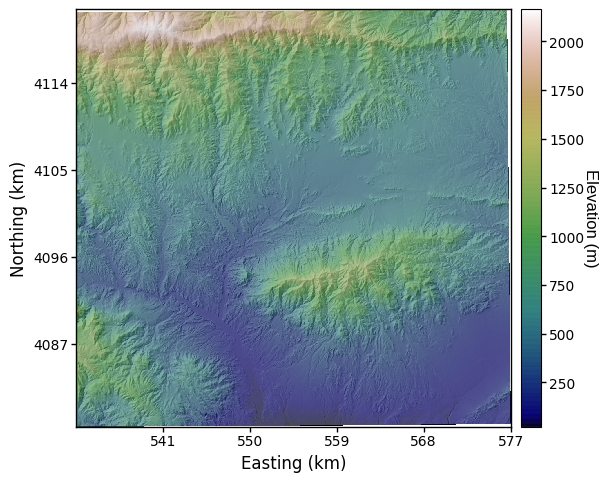

In [12]:
%matplotlib inline
Base_file = r_prefix
DataDirectory = "./"
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth", save_fig=False, size_format="geomorphology",dpi=500)

In [9]:
import pandas as pd
import rasterio
from pyproj import Proj, transform

def get_elevation(dem_file, easting, northing):
    with rasterio.open(dem_file) as dem:
        # Convert UTM to latitude and longitude
        utm = Proj(proj='utm', zone=30, ellps='WGS84')
        lon, lat = transform(utm, Proj(proj='latlong', datum='WGS84'), easting, northing)

        # Transform coordinates to the DEM's own coordinate system
        x, y = dem.index(lon, lat)

        # Read the first band of the DEM
        band1 = dem.read(1)

        # Sample the elevation at the transformed coordinates
        elevation = band1[x, y]

        return elevation

# Read locations from CSV file
df = pd.read_csv('Sample_Location_Coordinates_River_Grain_Size_Group.csv')

# DEM file path
dem_file = 'RioAguas_COP30.tif'

# Get elevations for all coordinates
elevations = [get_elevation(dem_file, row['easting'], row['northing']) for index, row in df.iterrows()]

print(elevations)


<ipython-input-9-9cbdaf645f2b>:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(utm, Proj(proj='latlong', datum='WGS84'), easting, northing)
<ipython-input-9-9cbdaf645f2b>:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(utm, Proj(proj='latlong', datum='WGS84'), easting, northing)
<ipython-input-9-9cbdaf645f2b>:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(utm, Proj(proj='latlong', datum='WGS84'), easting, northing)
<ipython-input-9-9cbdaf645f2b>:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(utm, Proj(proj='latlong', datum='WGS8

IndexError: index 1713 is out of bounds for axis 0 with size 1392

In [14]:
import pandas as pd
import rasterio

def get_elevation(dem_file, easting, northing):
    with rasterio.open(dem_file) as dem:
        # Transform coordinates to the DEM's own coordinate system


        x, y = dem.index(easting, northing)
        print("E,N are: "+str(easting)+" "+ str(northing))
        print("row, col are:"+str(x)+" "+str(y))

        # Read the first band of the DEM
        band1 = dem.read(1)

        # Sample the elevation at the transformed coordinates
        elevation = band1[y, x]

        return elevation



In [20]:

# Read locations from CSV file
df = pd.read_csv('Book2.csv')

df.head(10)



,location,easting,northing
0,1.1,549934,4096546
1,1.2,549941,4096536
2,1.3,549948,4096532
3,2.1,550195,4096391
4,2.2,550203,4096366
5,2.3,550209,4096359
6,3.1,550169,4096350
7,3.2,550170,4096341
8,3.3,550179,4096330
9,4.1,549986,4096306


In [22]:
# DEM file path
dem_file = 'RioAguas_COP30_UTM.tif'



# Get elevations for all coordinates and add them to a new column in the DataFrame
df['elevation'] = [get_elevation(dem_file, row['easting'], row['northing']) for index, row in df.iterrows()]

# Write the DataFrame with the new column back to the CSV file
df.to_csv('locations_with_elevations.csv', index=False)

print("Elevations added to CSV file.")

E,N are: 549934.0 4096546.0
row, col are:835 595
E,N are: 549941.0 4096536.0
row, col are:835 595
E,N are: 549948.0 4096532.0
row, col are:836 595
E,N are: 550195.0 4096391.0
row, col are:840 603
E,N are: 550203.0 4096366.0
row, col are:841 604
E,N are: 550209.0 4096359.0
row, col are:841 604
E,N are: 550169.0 4096350.0
row, col are:842 602
E,N are: 550170.0 4096341.0
row, col are:842 603
E,N are: 550179.0 4096330.0
row, col are:842 603
E,N are: 549986.0 4096306.0
row, col are:843 596
E,N are: 549980.0 4096302.0
row, col are:843 596
E,N are: 549979.0 4096292.0
row, col are:844 596
E,N are: 549601.0 4096410.0
row, col are:840 584
E,N are: 549586.0 4096401.0
row, col are:840 583
E,N are: 549588.0 4096393.0
row, col are:840 583
E,N are: 549500.0 4096177.0
row, col are:847 580
E,N are: 549504.0 4096167.0
row, col are:848 580
E,N are: 549509.0 4096155.0
row, col are:848 580
E,N are: 549687.0 4096266.0
row, col are:844 586
E,N are: 549692.0 4096262.0
row, col are:845 587
E,N are: 549699.0 40